# Homework 1  
## Statistical & Machine Learning Approaches for Marketing
### Juliana Sanchez Ramirez

### Chapter 2
### Excercise 2
Explain whether each scenario is a classification or regression problem, and indicate whether we are most interested in inference or prediction. Finally, provide n and p.

 A. We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary 
 #### REGRESSION

 B.We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20
similar products that were previously launched. For each product we have recorded whether it was a success or failure, price
charged for the product, marketing budget, competition price, and ten other variables.
#### CLASSIFICATION

 C. We are interest in predicting the % change in the USD/Euro exchange rate in relation to the weekly changes in the world
stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the USD/Euro, the %
change in the US market, the % change in the British market, and the % change in the German market.
#### REGRESSION

### Excercise 10
10. This exercise involves the Boston housing data set.
(a) To begin, load in the Boston data set. The Boston data set is part of the MASS library in R.
How many rows are in this data set? How many columns? 
What do the rows and columns represent?

In [2]:
library(dplyr)

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [3]:
#install.packages("psych")
library(MASS)
head(Boston)
?Boston

Warning message:
"package 'MASS' was built under R version 3.6.3"
Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select



crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


The Boston data frame has 506 rows and 14 columns.
Each row represents a suburb in Boston and each column a variable 

(b) Make some pairwise scatterplots of the predictors (columns) in
this data set. Describe your findings.


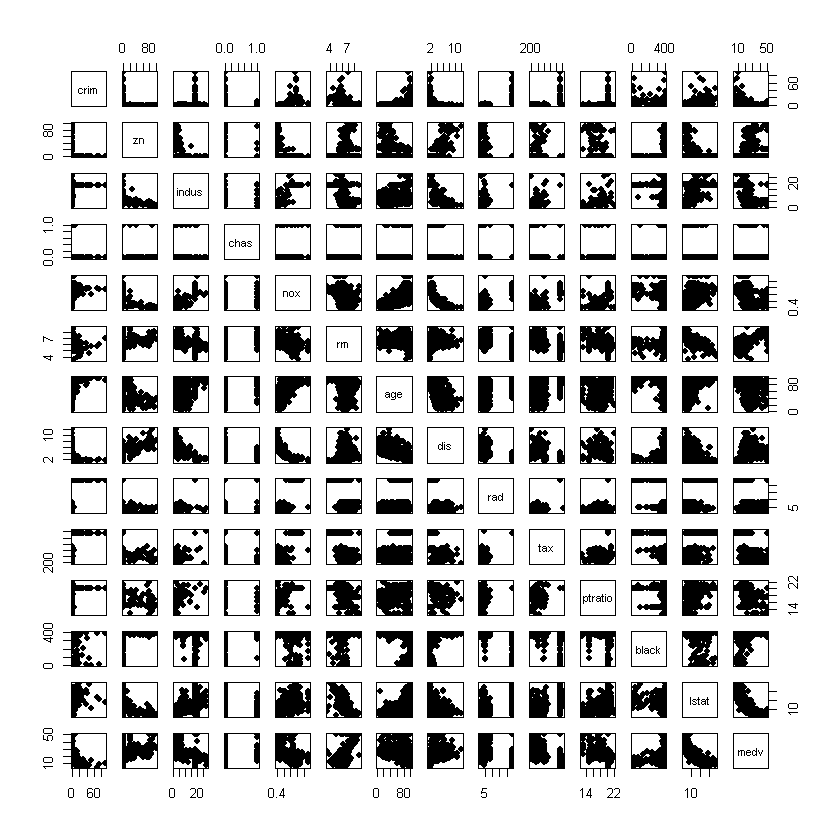

In [9]:
pairs(Boston, pch = 19)

1.There is a positive relation between the variables Prop. of non.retail business acres per town and full-value property-tax rate per 10.000
2.There is a negative relation between the variables Prop. of non.retail business acres per town and weighted mean of distances to five Boston employment centres
3.There is a negative relation between the variables average number of rooms per dwelling and lower status of the population. This one doe not look as linear.
3.There is a positive relation between the variables average number of rooms per dwelling and median value of owner-occupied homes in 1.000. This relation is stronger when the no. of rooms per dwelling is more than 7

(c) Are any of the predictors associated with per capita crime rate?
If so, explain the relationship.


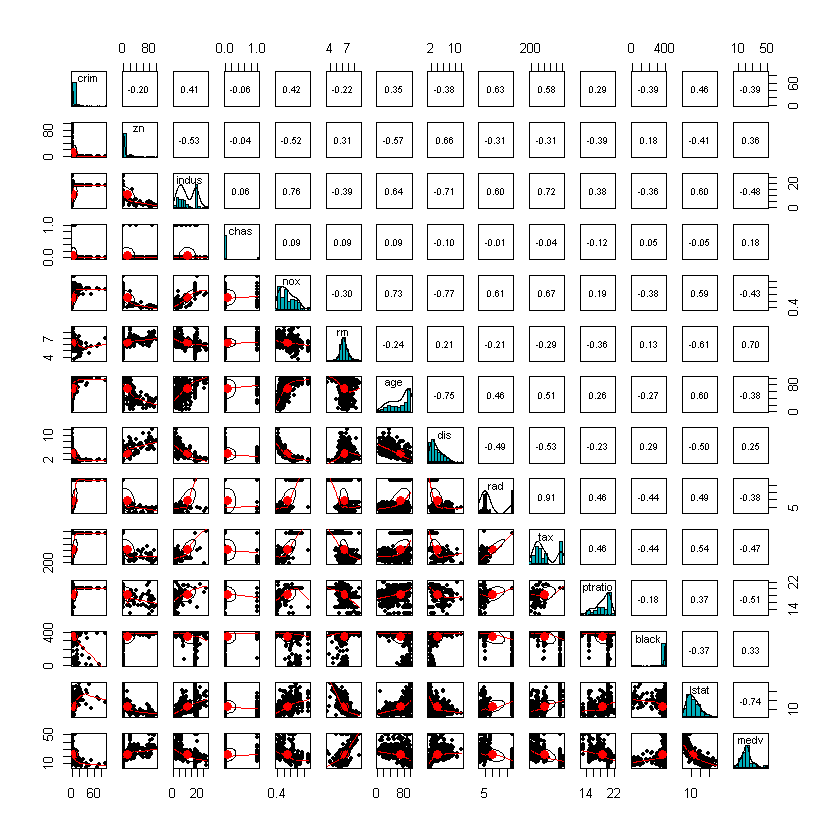

In [22]:
library(psych)
pairs.panels(Boston, 
             method = "pearson", # correlation method
             hist.col = "#00AFBB",
             density = TRUE,  # show density plots
             ellipses = TRUE # show correlation ellipses
             )
#http://www.sthda.com/english/wiki/scatter-plot-matrices-r-base-graphs

There is a high correlation between crime ND index of accessibility to radial highways as it is possible to observe that crime is lower for low indexes of accesibility.
A similar effect can be observed with the vriable full-value property-tax rate per 10,000, Where the crime is lower for suburbs with low tax rates
There is a negative relation between the crime and median value of owner-occupied homes in 1000s.

(d) Do any of the suburbs of Boston appear to have particularly
high crime rates? Tax rates? Pupil-teacher ratios? Comment on
the range of each predictor.


In [24]:
sapply(Boston, range)

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0.00632,0,0.46,0,0.385,3.561,2.9,1.1296,1,187,12.6,0.32,1.73,5
88.97620,100,27.74,1,0.871,8.780,100.0,12.1265,24,711,22.0,396.90,37.97,50


In [32]:
apply( Boston , 2 , quantile , probs = 0.99 , na.rm = TRUE )

crim        zn     indus      chas       nox        rm       age       dis 
 41.37033  90.00000  25.65000   1.00000   0.87100   8.33500 100.00000   9.22277 
      rad       tax   ptratio     black     lstat      medv 
 24.00000 666.00000  21.20000 396.90000  33.91850  50.00000

-crim: the max value is 88.9, but 99% of the suburbs have values under 42

-zn: Max value is 100 but 99% of the suburbs have values under 90

-indus: Max value is 27.7 and this value is close to the percentile 99

-chas: binary variable 0 or 1

-nox: The max value equals the percentile 99 = 0.871

-rm: Max value is 8.78 and this value is close to the percentile 99

-age: The max value equals the percentile 99 = 100

-dis: The max value is 12.12 and the percentile 99 is 9.22

-rad:  The max value equals the percentile 99 = 24

-tax: the max value is 711, but 99% of the suburbs have values under 666

-ptratio: Max value is 22 and this value is close to the percentile 99

-black: The max value equals the percentile 99 = 396.9

-lstat: the max value is 37.97, but 99% of the suburbs have values under 33.9

-medv: The max value equals the percentile 99 = 50

(e) How many of the suburbs in this data set bound the Charles
river?


In [34]:
count(Boston %>% filter(chas == 1))

n
35


35 suburbs bound the Charles river

(f) What is the median pupil-teacher ratio among the towns in this
data set?


In [36]:
median(Boston$ptratio)

[1] 19.05

the median pupil-teacher ratio among the towns is 19.05

(g) Which suburb of Boston has lowest median value of owneroccupied homes? What are the values of the other predictors
for that suburb, and how do those values compare to the overall
ranges for those predictors? Comment on your findings.


In [38]:
Boston %>% filter(medv == min(medv))

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
38.3518,0,18.1,0,0.693,5.453,100,1.4896,24,666,20.2,396.90,30.59,5
67.9208,0,18.1,0,0.693,5.683,100,1.4254,24,666,20.2,384.97,22.98,5


In [8]:
summary(Boston)

      crim                zn             indus            chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      rad              tax 

#### For the first observation
* crim has a high value, this one is in the 4th quartile.
* zn is below the mean which is 11.36
* indus is in the third quartile = 18.1
* chas is equal to the median = 0
* nox is in the 4th quartile
* rm is in the1st quartile
* age is the maximum value in the 4th quartile
* dis is in the 1st quartile
* rad is equal to the 3rd quartile
* tax is equal to the 3rd quartile
* ptratio is equal to the 3rd quartile
* black is the maximum value 396.9
* lstat is in the 4th quartile
* medv is the minimum value



#### For the second observation
* crim has a high value, this one is in the 4th quartile.
* zn is below the mean which is 11.36
* indus is in the third quartile = 18.1
* chas is equal to the median = 0
* nox is in the 4th quartile
* rm is in the1st quartile
* age is the maximum value in the 4th quartile
* dis is in the 1st quartile
* rad is equal to the 3rd quartile
* tax is equal to the 3rd quartile
* ptratio is equal to the 3rd quartile
* black is the maximum value 396.9
* lstat is in the 4th quartile
* medv is the minimum value

(h) In this data set, how many of the suburbs average more than
seven rooms per dwelling? More than eight rooms per dwelling?
Comment on the suburbs that average more than eight rooms
per dwelling.

In [4]:
count(Boston %>% filter(rm > 7))

n
64


In [41]:
Boston %>% filter(rm > 8)

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0.12083,0,2.89,0,0.4450,8.069,76.0,3.4952,2,276,18.0,396.90,4.21,38.7
1.51902,0,19.58,1,0.6050,8.375,93.9,2.1620,5,403,14.7,388.45,3.32,50.0
0.02009,95,2.68,0,0.4161,8.034,31.9,5.1180,4,224,14.7,390.55,2.88,50.0
0.31533,0,6.20,0,0.5040,8.266,78.3,2.8944,8,307,17.4,385.05,4.14,44.8
0.52693,0,6.20,0,0.5040,8.725,83.0,2.8944,8,307,17.4,382.00,4.63,50.0
0.38214,0,6.20,0,0.5040,8.040,86.5,3.2157,8,307,17.4,387.38,3.13,37.6
0.57529,0,6.20,0,0.5070,8.337,73.3,3.8384,8,307,17.4,385.91,2.47,41.7
0.33147,0,6.20,0,0.5070,8.247,70.4,3.6519,8,307,17.4,378.95,3.95,48.3
0.36894,22,5.86,0,0.4310,8.259,8.4,8.9067,7,330,19.1,396.90,3.54,42.8
0.61154,20,3.97,0,0.6470,8.704,86.9,1.8010,5,264,13.0,389.70,5.12,50.0


## Chapter 3
### Excercise 3

3 - Suppose we have a data set with five predictors, X1 = GPA, X2 = IQ, X3 = Gender (1 for Female and 0 for Male), X4 = Interaction between GPA and IQ, and X5 = Interaction between GPA and Gender. The response is starting salary after graduation (in thousands of dollars). Suppose we use least squares to fit the model, and get βˆ0 = 50, βˆ1 = 20, βˆ2 = 0.07, βˆ3 = 35, βˆ4 = 0.01, βˆ5 = −10.

(a) Which answer is correct, and why?

    i. For a fixed value of IQ and GPA, males earn more on average than females.
    ii. For a fixed value of IQ and GPA, females earn more on average than males.
    iii. For a fixed value of IQ and GPA, males earn more on average than females provided that the GPA is high enough.
    iv. For a fixed value of IQ and GPA, females earn more on average than males provided that the GPA is high enough.
 
#### Answer: 
iii Is correct because the coefficient of Gender is 35 when the gender is 1 (Female) the value increases in 35 but the value of GPA is also important because the interaction between GPA and gender is negative, with a high gpa the value decreases for females but for males there is no decrease


(b) Predict the salary of a female with IQ of 110 and a GPA of 4.0.

50 +20*(4.0)+0.07*(110)+35*(1)+0.01*(4*110)-10*(4*1)
#### 137.1

(c) True or false: Since the coefficient for the GPA/IQ interaction term is very small, there is very little evidence of an interaction effect. Justify your answer.
#### False: To conclude that it is necessary to check the p value of the t-test to conclude whether the interaction is significative or not

### Excercise 10

10- This question should be answered using the Carseats data set.

(a) Fit a multiple regression model to predict Sales using Price, Urban, and US.

In [11]:
library(ISLR)

In [18]:
head(Carseats)
?Carseats

Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
11.22,111,48,16,260,83,Good,65,10,Yes,Yes
10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4.15,141,64,3,340,128,Bad,38,13,Yes,No
10.81,124,113,13,501,72,Bad,78,16,No,Yes


In [17]:
linear_reg = lm(Sales~ Price + Urban + US, data=Carseats)
summary(linear_reg)


Call:
lm(formula = Sales ~ Price + Urban + US, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9206 -1.6220 -0.0564  1.5786  7.0581 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.043469   0.651012  20.036  < 2e-16 ***
Price       -0.054459   0.005242 -10.389  < 2e-16 ***
UrbanYes    -0.021916   0.271650  -0.081    0.936    
USYes        1.200573   0.259042   4.635 4.86e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.472 on 396 degrees of freedom
Multiple R-squared:  0.2393,	Adjusted R-squared:  0.2335 
F-statistic: 41.52 on 3 and 396 DF,  p-value: < 2.2e-16


(b) Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!
#### Price:
The negative coefficient indicates that per each increase in Price company charges for car seats at each site the sales decrease by 0.05

#### Urban
For stores located in urban location the sales decrease by 0.02. Neverthless this coefficient is not significative

#### US
For stores located in the US the sales increase is 1.2

#### Intercept
The sales base is 13

(c) Write out the model in equation form, being careful to handle the qualitative variables properly.

Sales = 13 - 0.05*(Price) - 0.02*(1:Urban, 0*Rural) + 1.2*(1:US, 0: Non US)

(d) For which of the predictors can you reject the null hypothesis H0 : βj = 0?

#### Answer: For USYes and Price because the p-value is less than 0.05  

(e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.


In [19]:
linear_reg2 = lm(Sales~ Price  + US, data=Carseats)
summary(linear_reg2)


Call:
lm(formula = Sales ~ Price + US, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9269 -1.6286 -0.0574  1.5766  7.0515 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.03079    0.63098  20.652  < 2e-16 ***
Price       -0.05448    0.00523 -10.416  < 2e-16 ***
USYes        1.19964    0.25846   4.641 4.71e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.469 on 397 degrees of freedom
Multiple R-squared:  0.2393,	Adjusted R-squared:  0.2354 
F-statistic: 62.43 on 2 and 397 DF,  p-value: < 2.2e-16


(f) How well do the models in (a) and (e) fit the data?
#### The quality of the models is very poor because the adjusted R-squared is small 0.233 and 0.235

(g) Using the model from (e), obtain 95 % confidence intervals for the coefficient(s).

In [21]:
confint(linear_reg2)

,2.5 %,97.5 %
(Intercept),11.79032020,14.27126531
Price,-0.06475984,-0.04419543
USYes,0.69151957,1.70776632


(h) Is there evidence of outliers or high leverage observations in the model from (e)?

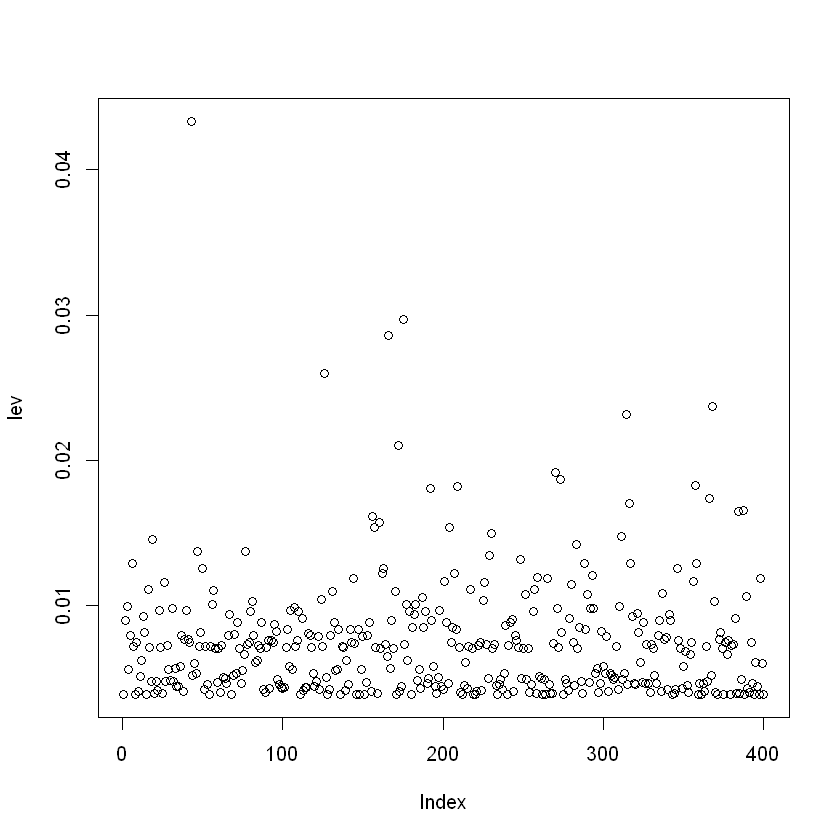

In [22]:
lev<-hat(model.matrix(linear_reg2))
plot(lev)

There is no apparently appearance of outliers because in the leverage plot the values are small. That means that there is no strong effect in residuals for extreme values.

15- This problem involves the Boston data set, which we saw in the lab for this chapter. We will now try to predict per capita crime rate using the other variables in this data set. In other words, per capita crime rate is the response, and the other variables are the predictors.

(a) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions.


In [27]:
names(Boston)

[1] "crim"    "zn"      "indus"   "chas"    "nox"     "rm"      "age"    
 [8] "dis"     "rad"     "tax"     "ptratio" "black"   "lstat"   "medv"

In [30]:
Boston1 = lm(crim ~ zn, data=Boston)
summary(Boston1)


Call:
lm(formula = crim ~ zn, data = Boston)

Residuals:
   Min     1Q Median     3Q    Max 
-4.429 -4.222 -2.620  1.250 84.523 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.45369    0.41722  10.675  < 2e-16 ***
zn          -0.07393    0.01609  -4.594 5.51e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.435 on 504 degrees of freedom
Multiple R-squared:  0.04019,	Adjusted R-squared:  0.03828 
F-statistic:  21.1 on 1 and 504 DF,  p-value: 5.506e-06


In [32]:
Boston2 = lm(crim ~ indus, data=Boston)
summary(Boston2)


Call:
lm(formula = crim ~ indus, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-11.972  -2.698  -0.736   0.712  81.813 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.06374    0.66723  -3.093  0.00209 ** 
indus        0.50978    0.05102   9.991  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.866 on 504 degrees of freedom
Multiple R-squared:  0.1653,	Adjusted R-squared:  0.1637 
F-statistic: 99.82 on 1 and 504 DF,  p-value: < 2.2e-16


In [33]:
Boston3 = lm(crim ~ chas, data=Boston)
summary(Boston3)


Call:
lm(formula = crim ~ chas, data = Boston)

Residuals:
   Min     1Q Median     3Q    Max 
-3.738 -3.661 -3.435  0.018 85.232 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.7444     0.3961   9.453   <2e-16 ***
chas         -1.8928     1.5061  -1.257    0.209    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.597 on 504 degrees of freedom
Multiple R-squared:  0.003124,	Adjusted R-squared:  0.001146 
F-statistic: 1.579 on 1 and 504 DF,  p-value: 0.2094


In [34]:
Boston4 = lm(crim ~ nox, data=Boston)
summary(Boston4)


Call:
lm(formula = crim ~ nox, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-12.371  -2.738  -0.974   0.559  81.728 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -13.720      1.699  -8.073 5.08e-15 ***
nox           31.249      2.999  10.419  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.81 on 504 degrees of freedom
Multiple R-squared:  0.1772,	Adjusted R-squared:  0.1756 
F-statistic: 108.6 on 1 and 504 DF,  p-value: < 2.2e-16


In [35]:
Boston5 = lm(crim ~ rm, data=Boston)
summary(Boston5)


Call:
lm(formula = crim ~ rm, data = Boston)

Residuals:
   Min     1Q Median     3Q    Max 
-6.604 -3.952 -2.654  0.989 87.197 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   20.482      3.365   6.088 2.27e-09 ***
rm            -2.684      0.532  -5.045 6.35e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.401 on 504 degrees of freedom
Multiple R-squared:  0.04807,	Adjusted R-squared:  0.04618 
F-statistic: 25.45 on 1 and 504 DF,  p-value: 6.347e-07


In [36]:
Boston6 = lm(crim ~ age, data=Boston)
summary(Boston6)


Call:
lm(formula = crim ~ age, data = Boston)

Residuals:
   Min     1Q Median     3Q    Max 
-6.789 -4.257 -1.230  1.527 82.849 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.77791    0.94398  -4.002 7.22e-05 ***
age          0.10779    0.01274   8.463 2.85e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.057 on 504 degrees of freedom
Multiple R-squared:  0.1244,	Adjusted R-squared:  0.1227 
F-statistic: 71.62 on 1 and 504 DF,  p-value: 2.855e-16


In [37]:
Boston7 = lm(crim ~ dis, data=Boston)
summary(Boston7)


Call:
lm(formula = crim ~ dis, data = Boston)

Residuals:
   Min     1Q Median     3Q    Max 
-6.708 -4.134 -1.527  1.516 81.674 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.4993     0.7304  13.006   <2e-16 ***
dis          -1.5509     0.1683  -9.213   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.965 on 504 degrees of freedom
Multiple R-squared:  0.1441,	Adjusted R-squared:  0.1425 
F-statistic: 84.89 on 1 and 504 DF,  p-value: < 2.2e-16


In [38]:
Boston8 = lm(crim ~ rad, data=Boston)
summary(Boston8)


Call:
lm(formula = crim ~ rad, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.164  -1.381  -0.141   0.660  76.433 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.28716    0.44348  -5.157 3.61e-07 ***
rad          0.61791    0.03433  17.998  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.718 on 504 degrees of freedom
Multiple R-squared:  0.3913,	Adjusted R-squared:   0.39 
F-statistic: 323.9 on 1 and 504 DF,  p-value: < 2.2e-16


In [39]:
Boston9 = lm(crim ~ tax, data=Boston)
summary(Boston9)


Call:
lm(formula = crim ~ tax, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-12.513  -2.738  -0.194   1.065  77.696 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -8.528369   0.815809  -10.45   <2e-16 ***
tax          0.029742   0.001847   16.10   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.997 on 504 degrees of freedom
Multiple R-squared:  0.3396,	Adjusted R-squared:  0.3383 
F-statistic: 259.2 on 1 and 504 DF,  p-value: < 2.2e-16


In [40]:
Boston10 = lm(crim ~ ptratio, data=Boston)
summary(Boston10)


Call:
lm(formula = crim ~ ptratio, data = Boston)

Residuals:
   Min     1Q Median     3Q    Max 
-7.654 -3.985 -1.912  1.825 83.353 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -17.6469     3.1473  -5.607 3.40e-08 ***
ptratio       1.1520     0.1694   6.801 2.94e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.24 on 504 degrees of freedom
Multiple R-squared:  0.08407,	Adjusted R-squared:  0.08225 
F-statistic: 46.26 on 1 and 504 DF,  p-value: 2.943e-11


In [41]:
Boston11 = lm(crim ~ black, data=Boston)
summary(Boston11)


Call:
lm(formula = crim ~ black, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.756  -2.299  -2.095  -1.296  86.822 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 16.553529   1.425903  11.609   <2e-16 ***
black       -0.036280   0.003873  -9.367   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.946 on 504 degrees of freedom
Multiple R-squared:  0.1483,	Adjusted R-squared:  0.1466 
F-statistic: 87.74 on 1 and 504 DF,  p-value: < 2.2e-16


In [42]:
Boston12 = lm(crim ~ lstat, data=Boston)
summary(Boston12)


Call:
lm(formula = crim ~ lstat, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.925  -2.822  -0.664   1.079  82.862 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.33054    0.69376  -4.801 2.09e-06 ***
lstat        0.54880    0.04776  11.491  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.664 on 504 degrees of freedom
Multiple R-squared:  0.2076,	Adjusted R-squared:  0.206 
F-statistic:   132 on 1 and 504 DF,  p-value: < 2.2e-16


In [43]:
Boston13 = lm(crim ~ medv, data=Boston)
summary(Boston13)


Call:
lm(formula = crim ~ medv, data = Boston)

Residuals:
   Min     1Q Median     3Q    Max 
-9.071 -4.022 -2.343  1.298 80.957 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 11.79654    0.93419   12.63   <2e-16 ***
medv        -0.36316    0.03839   -9.46   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.934 on 504 degrees of freedom
Multiple R-squared:  0.1508,	Adjusted R-squared:  0.1491 
F-statistic: 89.49 on 1 and 504 DF,  p-value: < 2.2e-16


### Results:
For all the variables there is a statistically significant association with the crime except for: chas (Boundary with Charles River)

(b) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors
can we reject the null hypothesis H0 : βj = 0?

In [45]:
Boston_lm = lm(crim ~ ., data=Boston)
summary(Boston_lm)


Call:
lm(formula = crim ~ ., data = Boston)

Residuals:
   Min     1Q Median     3Q    Max 
-9.924 -2.120 -0.353  1.019 75.051 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  17.033228   7.234903   2.354 0.018949 *  
zn            0.044855   0.018734   2.394 0.017025 *  
indus        -0.063855   0.083407  -0.766 0.444294    
chas         -0.749134   1.180147  -0.635 0.525867    
nox         -10.313535   5.275536  -1.955 0.051152 .  
rm            0.430131   0.612830   0.702 0.483089    
age           0.001452   0.017925   0.081 0.935488    
dis          -0.987176   0.281817  -3.503 0.000502 ***
rad           0.588209   0.088049   6.680 6.46e-11 ***
tax          -0.003780   0.005156  -0.733 0.463793    
ptratio      -0.271081   0.186450  -1.454 0.146611    
black        -0.007538   0.003673  -2.052 0.040702 *  
lstat         0.126211   0.075725   1.667 0.096208 .  
medv         -0.198887   0.060516  -3.287 0.001087 ** 
---
Signif. codes:  0 '***' 0.0

In this case we can reject the null hypothesis for the variables zn, dis, rad, black and medv with an alpha of 5%
for the variables nox and lstat we can reject the null hypothesis for an alpha of 10%


(c) How do your results from (a) compare to your results from (b)? Create a plot displaying the univariate regression coefficients
from (a) on the x-axis, and the multiple regression coefficients from (b) on the y-axis. That is, each predictor is displayed as a
single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate
in the multiple linear regression model is shown on the y-axis.


It is possible to observe that compared with the results of the previous excercise the significance of some variables changed, this can be the result of "hidden" effects of other variables in the simple linear regressions.
In the multiple linear regression the coefficients tend to decrease

In [53]:
univariate<-vector("numeric",0)
univariate<-c(univariate,Boston1$coefficients[2])
univariate<-c(univariate,Boston2$coefficients[2])
univariate<-c(univariate,Boston3$coefficients[2])
univariate<-c(univariate,Boston4$coefficients[2])
univariate<-c(univariate,Boston5$coefficients[2])
univariate<-c(univariate,Boston6$coefficients[2])
univariate<-c(univariate,Boston7$coefficients[2])
univariate<-c(univariate,Boston8$coefficients[2])
univariate<-c(univariate,Boston9$coefficients[2])
univariate<-c(univariate,Boston10$coefficients[2])
univariate<-c(univariate,Boston11$coefficients[2])
univariate<-c(univariate,Boston12$coefficients[2])
univariate<-c(univariate,Boston13$coefficients[2])
univariate

zn       indus        chas         nox          rm         age 
-0.07393498  0.50977633 -1.89277655 31.24853120 -2.68405122  0.10778623 
        dis         rad         tax     ptratio       black       lstat 
-1.55090168  0.61791093  0.02974225  1.15198279 -0.03627964  0.54880478 
       medv 
-0.36315992

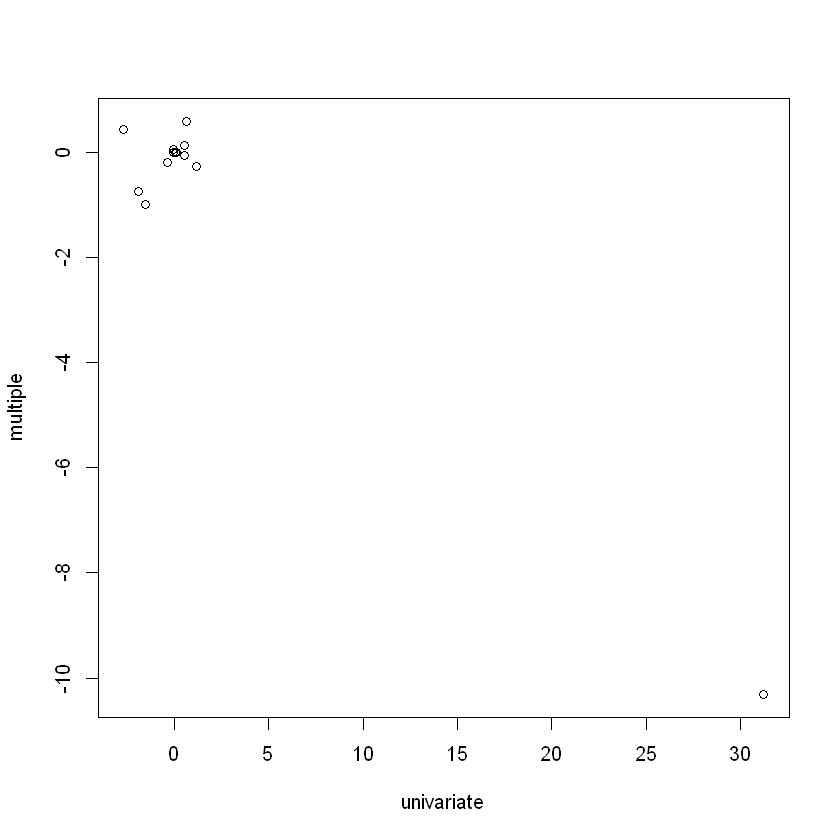

In [54]:
multiple<-vector("numeric",0)
multiple<-c(multiple,Boston_lm$coefficients)
multiple<-multiple[-1]
plot(univariate,multiple)

(d) Is there evidence of non-linear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form
Y = β0 + β1X + β2X2 + β3X3 + .

In [57]:
Boston1_pol=lm(crim ~ poly(zn,3), data=Boston)
summary(Boston1_pol)


Call:
lm(formula = crim ~ poly(zn, 3), data = Boston)

Residuals:
   Min     1Q Median     3Q    Max 
-4.821 -4.614 -1.294  0.473 84.130 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    3.6135     0.3722   9.709  < 2e-16 ***
poly(zn, 3)1 -38.7498     8.3722  -4.628  4.7e-06 ***
poly(zn, 3)2  23.9398     8.3722   2.859  0.00442 ** 
poly(zn, 3)3 -10.0719     8.3722  -1.203  0.22954    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.372 on 502 degrees of freedom
Multiple R-squared:  0.05824,	Adjusted R-squared:  0.05261 
F-statistic: 10.35 on 3 and 502 DF,  p-value: 1.281e-06


In [58]:
Boston2_pol=lm(crim ~ poly(indus,3), data=Boston)
summary(Boston2_pol)


Call:
lm(formula = crim ~ poly(indus, 3), data = Boston)

Residuals:
   Min     1Q Median     3Q    Max 
-8.278 -2.514  0.054  0.764 79.713 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)        3.614      0.330  10.950  < 2e-16 ***
poly(indus, 3)1   78.591      7.423  10.587  < 2e-16 ***
poly(indus, 3)2  -24.395      7.423  -3.286  0.00109 ** 
poly(indus, 3)3  -54.130      7.423  -7.292  1.2e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.423 on 502 degrees of freedom
Multiple R-squared:  0.2597,	Adjusted R-squared:  0.2552 
F-statistic: 58.69 on 3 and 502 DF,  p-value: < 2.2e-16


In [60]:
Boston4_pol=lm(crim ~ poly(nox,3), data=Boston)
summary(Boston4_pol)


Call:
lm(formula = crim ~ poly(nox, 3), data = Boston)

Residuals:
   Min     1Q Median     3Q    Max 
-9.110 -2.068 -0.255  0.739 78.302 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     3.6135     0.3216  11.237  < 2e-16 ***
poly(nox, 3)1  81.3720     7.2336  11.249  < 2e-16 ***
poly(nox, 3)2 -28.8286     7.2336  -3.985 7.74e-05 ***
poly(nox, 3)3 -60.3619     7.2336  -8.345 6.96e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.234 on 502 degrees of freedom
Multiple R-squared:  0.297,	Adjusted R-squared:  0.2928 
F-statistic: 70.69 on 3 and 502 DF,  p-value: < 2.2e-16


In [61]:
Boston5_pol=lm(crim ~ poly(rm,3), data=Boston)
summary(Boston5_pol)


Call:
lm(formula = crim ~ poly(rm, 3), data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-18.485  -3.468  -2.221  -0.015  87.219 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    3.6135     0.3703   9.758  < 2e-16 ***
poly(rm, 3)1 -42.3794     8.3297  -5.088 5.13e-07 ***
poly(rm, 3)2  26.5768     8.3297   3.191  0.00151 ** 
poly(rm, 3)3  -5.5103     8.3297  -0.662  0.50858    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.33 on 502 degrees of freedom
Multiple R-squared:  0.06779,	Adjusted R-squared:  0.06222 
F-statistic: 12.17 on 3 and 502 DF,  p-value: 1.067e-07


In [62]:
Boston6_pol=lm(crim ~ poly(age,3), data=Boston)
summary(Boston6_pol)


Call:
lm(formula = crim ~ poly(age, 3), data = Boston)

Residuals:
   Min     1Q Median     3Q    Max 
-9.762 -2.673 -0.516  0.019 82.842 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     3.6135     0.3485  10.368  < 2e-16 ***
poly(age, 3)1  68.1820     7.8397   8.697  < 2e-16 ***
poly(age, 3)2  37.4845     7.8397   4.781 2.29e-06 ***
poly(age, 3)3  21.3532     7.8397   2.724  0.00668 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.84 on 502 degrees of freedom
Multiple R-squared:  0.1742,	Adjusted R-squared:  0.1693 
F-statistic: 35.31 on 3 and 502 DF,  p-value: < 2.2e-16


In [63]:
Boston7_pol=lm(crim ~ poly(dis,3), data=Boston)
summary(Boston7_pol)


Call:
lm(formula = crim ~ poly(dis, 3), data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.757  -2.588   0.031   1.267  76.378 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     3.6135     0.3259  11.087  < 2e-16 ***
poly(dis, 3)1 -73.3886     7.3315 -10.010  < 2e-16 ***
poly(dis, 3)2  56.3730     7.3315   7.689 7.87e-14 ***
poly(dis, 3)3 -42.6219     7.3315  -5.814 1.09e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.331 on 502 degrees of freedom
Multiple R-squared:  0.2778,	Adjusted R-squared:  0.2735 
F-statistic: 64.37 on 3 and 502 DF,  p-value: < 2.2e-16


In [64]:
Boston8_pol=lm(crim ~ poly(rad,3), data=Boston)
summary(Boston8_pol)


Call:
lm(formula = crim ~ poly(rad, 3), data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.381  -0.412  -0.269   0.179  76.217 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     3.6135     0.2971  12.164  < 2e-16 ***
poly(rad, 3)1 120.9074     6.6824  18.093  < 2e-16 ***
poly(rad, 3)2  17.4923     6.6824   2.618  0.00912 ** 
poly(rad, 3)3   4.6985     6.6824   0.703  0.48231    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.682 on 502 degrees of freedom
Multiple R-squared:    0.4,	Adjusted R-squared:  0.3965 
F-statistic: 111.6 on 3 and 502 DF,  p-value: < 2.2e-16


In [65]:
Boston9_pol=lm(crim ~ poly(tax,3), data=Boston)
summary(Boston9_pol)


Call:
lm(formula = crim ~ poly(tax, 3), data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.273  -1.389   0.046   0.536  76.950 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     3.6135     0.3047  11.860  < 2e-16 ***
poly(tax, 3)1 112.6458     6.8537  16.436  < 2e-16 ***
poly(tax, 3)2  32.0873     6.8537   4.682 3.67e-06 ***
poly(tax, 3)3  -7.9968     6.8537  -1.167    0.244    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.854 on 502 degrees of freedom
Multiple R-squared:  0.3689,	Adjusted R-squared:  0.3651 
F-statistic:  97.8 on 3 and 502 DF,  p-value: < 2.2e-16


In [66]:
Boston10_pol=lm(crim ~ poly(ptratio,3), data=Boston)
summary(Boston10_pol)


Call:
lm(formula = crim ~ poly(ptratio, 3), data = Boston)

Residuals:
   Min     1Q Median     3Q    Max 
-6.833 -4.146 -1.655  1.408 82.697 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)          3.614      0.361  10.008  < 2e-16 ***
poly(ptratio, 3)1   56.045      8.122   6.901 1.57e-11 ***
poly(ptratio, 3)2   24.775      8.122   3.050  0.00241 ** 
poly(ptratio, 3)3  -22.280      8.122  -2.743  0.00630 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.122 on 502 degrees of freedom
Multiple R-squared:  0.1138,	Adjusted R-squared:  0.1085 
F-statistic: 21.48 on 3 and 502 DF,  p-value: 4.171e-13


In [67]:
Boston11_pol=lm(crim ~ poly(black,3), data=Boston)
summary(Boston11_pol)


Call:
lm(formula = crim ~ poly(black, 3), data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.096  -2.343  -2.128  -1.439  86.790 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       3.6135     0.3536  10.218   <2e-16 ***
poly(black, 3)1 -74.4312     7.9546  -9.357   <2e-16 ***
poly(black, 3)2   5.9264     7.9546   0.745    0.457    
poly(black, 3)3  -4.8346     7.9546  -0.608    0.544    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.955 on 502 degrees of freedom
Multiple R-squared:  0.1498,	Adjusted R-squared:  0.1448 
F-statistic: 29.49 on 3 and 502 DF,  p-value: < 2.2e-16


In [68]:
Boston12_pol=lm(crim ~ poly(lstat,3), data=Boston)
summary(Boston12_pol)


Call:
lm(formula = crim ~ poly(lstat, 3), data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.234  -2.151  -0.486   0.066  83.353 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       3.6135     0.3392  10.654   <2e-16 ***
poly(lstat, 3)1  88.0697     7.6294  11.543   <2e-16 ***
poly(lstat, 3)2  15.8882     7.6294   2.082   0.0378 *  
poly(lstat, 3)3 -11.5740     7.6294  -1.517   0.1299    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.629 on 502 degrees of freedom
Multiple R-squared:  0.2179,	Adjusted R-squared:  0.2133 
F-statistic: 46.63 on 3 and 502 DF,  p-value: < 2.2e-16


In [69]:
Boston13_pol=lm(crim ~ poly(medv,3), data=Boston)
summary(Boston13_pol)


Call:
lm(formula = crim ~ poly(medv, 3), data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-24.427  -1.976  -0.437   0.439  73.655 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)       3.614      0.292  12.374  < 2e-16 ***
poly(medv, 3)1  -75.058      6.569 -11.426  < 2e-16 ***
poly(medv, 3)2   88.086      6.569  13.409  < 2e-16 ***
poly(medv, 3)3  -48.033      6.569  -7.312 1.05e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.569 on 502 degrees of freedom
Multiple R-squared:  0.4202,	Adjusted R-squared:  0.4167 
F-statistic: 121.3 on 3 and 502 DF,  p-value: < 2.2e-16


The models with the variables rad, tax and medv have R-squared close to 0.4 which can represent the existence of polinomial associations.

For the variables medv, ptratio, dis age, nox and indus the 3 coefficients are significative with an alpha of 5%